In [1]:
from gurobipy import Model, GRB, LinExpr, QuadExpr
import pandas as pd
import gurobipy
import numpy as np
import numpy.matlib
import os.path

In [2]:
import os
import sys

In [26]:
df3 = pd.read_csv('Jorda_Application_3_data.csv')
df3

,y,X1,X2
0,2.176497,1.723239,1
1,1.962030,2.176497,1
2,1.777503,1.962030,1
3,1.797476,1.777503,1
4,1.856502,1.797476,1
5,1.757918,1.856502,1
6,2.037176,1.757918,1
7,1.801004,2.037176,1
8,1.656293,1.801004,1
9,1.806666,1.656293,1


Text(0, 0.5, 'y (first column)')

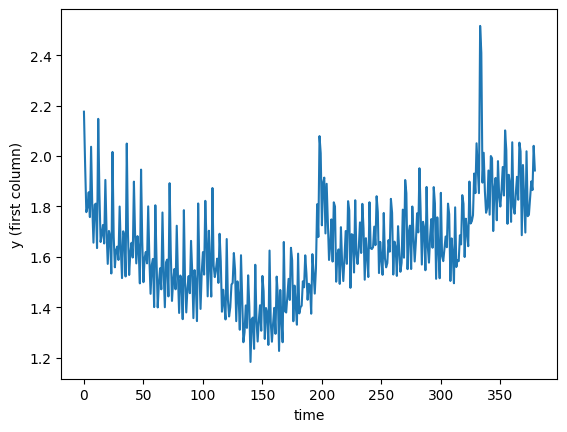

In [61]:
plt.plot(df3.y)
plt.xlabel('time')
plt.ylabel('y (first column)')

In [28]:
df1 = df3

In [52]:
T = len(df1)

In [53]:
len(df1)

380

In [ ]:





Lambda_Max = 'N/A'
steps = 'N/A'
sti, sta = None, None
#LS = np.logspace(np.log10(0.01*Lambda_Max),np.log10(Lambda_Max),10)
for lmbd_ind, lmbd_param in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]):
    model_mip = Model('Regr3')
    model_mip.Params.TIME_LIMIT = 600.0
    model_mip.Params.NumericFocus = 3
    #model_mip.Params.LogToConsole = 0
    model_mip.Params.LogFile = 'gur_logs_application_Jorda1234/log_appl_Jorda_'+str(lmbd_ind)+'.txt'
    print('start with br %s'%lmbd_param)
    #print(sti, sta)
    a = {}
    z = {}
    y = {}
    d = {}
    M = 20 #20

    int_mark = {}

    for i in range(T-1):
        int_mark[i] = model_mip.addVar(vtype=GRB.BINARY)

    for j in range(T):
        #y[j] = model_mip.addVar(vtype=GRB.BINARY)

        for i in range(2):
            a[j,i] = model_mip.addVar(vtype=GRB.CONTINUOUS, lb=-10, ub=10)


    for i in range(T-1):
        for j in range(2):
            model_mip.addConstr(a[i+1,j] - a[i,j] <=  M*int_mark[i])
            model_mip.addConstr(a[i+1,j] - a[i,j] >= -M*int_mark[i])


            #model_mip.addConstr(a[i+1,j] - a[i,j] >=  l*(int_mark[i]) - d[i,j]*40)
            #model_mip.addConstr(a[i+1,j] - a[i,j] <=  -l*(int_mark[i]) + (1-d[i,j])*40 )   

    # less N
    model_mip.addConstr(sum([int_mark[i] for i in int_mark ]) == lmbd_param)


    for i in range(T-2):
        model_mip.addConstr(int_mark[i] + int_mark[i+1] <= 1)

    expr_obj = QuadExpr(0)
    #expr_obj = LinExpr(0)
    for i,j in df1.head(T).iterrows():
        expr_obj.add((j['y'] - a[i,0]*j['X1'] -  a[i,1]*j['X2'] ) * (j['y'] - a[i,0]*j['X1'] -  a[i,1]*j['X2'] ))
        #expr_obj.add((j['y'] - a[i,0]*j['X1'] - a[i,1]*j['X2'] - a[i,2]*j['X3'] - a[i,3]))

    #expr_obj.add( lmbd_param* sum([int_mark[i] for i in int_mark ] ))  #removed 13 June



    model_mip.update()
    model_mip.setObjective(expr_obj, GRB.MINIMIZE)
    model_mip.optimize()

    A = [a[i].X for i in a if i[1] == 0]
    B = [a[i].X for i in a if i[1] == 1]
    C = [a[i].X for i in a if i[1] == 2]
    #C = [a[i].X for i in a if i[1] == 2]
    #B = [a[i].X for i in a if i[1] == 1]
    I = [-100]+[int_mark[i].X for i in int_mark]


    curr_res = pd.DataFrame()
    curr_res['a1'] = A
    curr_res['a2'] = B

    curr_res['int_mark'] = I
    
    cfn = 'gur_logs_application_Jorda1234/res_app_Jorda_'+str(lmbd_ind)
    curr_res.to_csv(cfn+'.csv')
    fres = open(cfn+'.txt','w')
    fres.write("%s"%model_mip.status)
    fres.write("\n")
    fres.write("%s"%model_mip.ObjVal)
    fres.write("\n")
    fres.write("%s"%model_mip.Runtime)
    fres.write("\n")
    fres.write("%s"%lmbd_param)
    fres.write("\n")
    fres.write("%s"%Lambda_Max)
    fres.write("\n")
    fres.write("%s\n"%steps)
    fres.write("%s\n"%model_mip.MIPGap)
    fres.close() 
    print("%s complete"%lmbd_ind)



In [106]:
df1.to_csv('~/Dropbox/MIP_regr/code/code_submission/Jorda_Application_3_data.csv')

In [69]:
df1

,y,X1,X2
0,2.176497,1.723239,1
1,1.962030,2.176497,1
2,1.777503,1.962030,1
3,1.797476,1.777503,1
4,1.856502,1.797476,1
5,1.757918,1.856502,1
6,2.037176,1.757918,1
7,1.801004,2.037176,1
8,1.656293,1.801004,1
9,1.806666,1.656293,1


In [59]:
#df1_ = df1.head(T)
print('i MSE CR GAP')
for i in range(0, 10):
    df=pd.read_csv(f'/Users/username/gur_logs_application_Jorda1234/res_app_Jorda_{i}.csv')
    length1 = len(df)
    #n_br += [len(np.where(df.int_mark > 0.5)[0])]
    #br += [np.where(df.int_mark > 0.5)[0]]
    at = df1['y'].to_numpy()-df1['X1'].to_numpy()*df['a1'].to_numpy()-df1['X2'].to_numpy()*df['a2'].to_numpy()
    at = np.sum(at**2)
    at1 = at
    at /= length1
    at = np.log(at) + 1/np.sqrt(length1)*(2*(len(np.where(df.int_mark > 0.5)[0])+1))
    f = open(f'/Users/username/gur_logs_application_Jorda1234/res_app_Jorda_{i}.txt')
    d = f.readlines()
    f.close()
    print("%s %.4f %.4f %.4f"%(i, at1, at, float(d[-1])))

i MSE CR GAP
0 10.1562 -3.5195 0.0000
1 8.9410 -3.5443 0.0000
2 8.0627 -3.5451 0.0000
3 7.0589 -3.5755 0.7330
4 6.4845 -3.5578 0.9018
5 6.0697 -3.5213 0.9671
6 5.6834 -3.4844 0.9775
7 5.4487 -3.4240 0.9828
8 5.1390 -3.3799 0.9922
9 4.9921 -3.3063 0.9976


In [60]:
print('i MSE CR GAP')
for i in range(0, 10):
    df=pd.read_csv(f'/Users/username/gur_logs_application_Jorda1234/res_app_Jorda_{i}.csv')
    length1 = len(df)
    br = [np.where(df.int_mark > 0.5)[0]]
    print(i, br)

i MSE CR GAP
0 [array([], dtype=int64)]
1 [array([324])]
2 [array([ 55, 195])]
3 [array([ 55, 196, 328])]
4 [array([ 50, 116, 195, 328])]
5 [array([ 50, 116, 195, 333, 335])]
6 [array([ 14,  50, 116, 195, 333, 335])]
7 [array([ 14,  56, 116, 195, 328, 333, 335])]
8 [array([ 14,  50, 116, 196, 205, 324, 333, 335])]
9 [array([ 14,  50, 116, 168, 196, 205, 324, 333, 335])]
